# Mod 4 Project - Starter Notebook

This notebook has been provided to you so that you can make use of the following starter code to help with the trickier parts of preprocessing the Zillow dataset. 

The notebook contains a rough outline the general order you'll likely want to take in this project. You'll notice that most of the areas are left blank. This is so that it's more obvious exactly when you should make use of the starter code provided for preprocessing. 

**_NOTE:_** The number of empty cells are not meant to infer how much or how little code should be involved in any given step--we've just provided a few for your convenience. Add, delete, and change things around in this notebook as needed!

# Some Notes Before Starting

This project will be one of the more challenging projects you complete in this program. This is because working with Time Series data is a bit different than working with regular datasets. In order to make this a bit less frustrating and help you understand what you need to do (and when you need to do it), we'll quickly review the dataset formats that you'll encounter in this project. 

## Wide Format vs Long Format

If you take a look at the format of the data in `zillow_data.csv`, you'll notice that the actual Time Series values are stored as separate columns. Here's a sample: 

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/df_head.png'>

You'll notice that the first seven columns look like any other dataset you're used to working with. However, column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. This This is called **_Wide Format_**, and it makes the dataframe intuitive and easy to read. However, there are problems with this format when it comes to actually learning from the data, because the data only makes sense if you know the name of the column that the data can be found it. Since column names are metadata, our algorithms will miss out on what dates each value is for. This means that before we pass this data to our ARIMA model, we'll need to reshape our dataset to **_Long Format_**. Reshaped into long format, the dataframe above would now look like:

<img src='https://raw.githubusercontent.com/learn-co-students/dsc-mod-4-project-seattle-ds-102819/master/images/melted1.png'>

There are now many more rows in this dataset--one for each unique time and zipcode combination in the data! Once our dataset is in this format, we'll be able to train an ARIMA model on it. The method used to convert from Wide to Long is `pd.melt()`, and it is common to refer to our dataset as 'melted' after the transition to denote that it is in long format. 

# Helper Functions Provided

Melting a dataset can be tricky if you've never done it before, so you'll see that we have provided a sample function, `melt_data()`, to help you with this step below. Also provided is:

* `get_datetimes()`, a function to deal with converting the column values for datetimes as a pandas series of datetime objects
* Some good parameters for matplotlib to help make your visualizations more readable. 

Good luck!


# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('zillow_data.csv')

In [3]:
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


# Step 2: Data Preprocessing

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[1:], format='%Y-%m')

In [5]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted#melted.groupby('time').aggregate({'value':'mean'})

In [6]:
# df_austin = df[df['City']=='Austin']

In [7]:
# df_austin = df_austin.drop(['RegionID'], axis=1)

In [8]:
# df_austin.head(2)

In [9]:
# df_austin = df_austin.drop(['SizeRank'], axis=1)

In [10]:
# df_austinlong = melt_data(df_austin)

In [11]:
# df_austinlong.sort_values(by='RegionName')

In [12]:
# df_austinlong.sort_values(by='RegionName', inplace=True)

In [13]:
df.drop('RegionID', axis=1, inplace=True)

In [14]:
df.drop('SizeRank', axis=1, inplace=True)

In [15]:
df_melted = melt_data(df)

In [16]:
df_texas = df_melted[df_melted['State']=='TX']

In [17]:
df_texas.set_index('time', inplace=True)

In [18]:
df_texas.index = pd.to_datetime(df_texas.index)

In [19]:
df_texas[df_texas['Metro'].isna()]

,RegionName,City,State,Metro,CountyName,value
time,,,,,,
1996-04-01,77351,West Livingston,TX,NaN,Polk,60700.0
1996-04-01,78654,Marble Falls,TX,NaN,Burnet,127400.0
1996-04-01,75633,Carthage,TX,NaN,Panola,51800.0
1996-04-01,78611,Burnet,TX,NaN,Burnet,93400.0
1996-04-01,75169,Wills Point,TX,NaN,Van Zandt,60000.0
...,...,...,...,...,...,...
2018-04-01,78393,Woodsboro,TX,NaN,Refugio,80300.0
2018-04-01,79064,Olton,TX,NaN,Lamb,40300.0
2018-04-01,79325,Farwell,TX,NaN,Parmer,110900.0


In [28]:
df_harris = df_texas[df_texas['CountyName']=='Harris'].copy()

In [29]:
df_harris['RegionName'].nunique()

121

In [30]:
## Figure out how to make a dataframe that shows each RegionName 2/5/10 yr growth pct changes and then
## narrow it down. Narrow it down based on top short/mid/long term prospects and recovery speed/std/interest rate
## correlation

In [31]:
df_harris.drop(columns=['City', 'State', 'Metro', 'CountyName'], axis=1, inplace=True)

In [40]:
df_harris

,RegionName,value
time,,
1996-04-01,77494,210400.0
1996-04-01,77084,95000.0
1996-04-01,77449,95400.0
1996-04-01,77429,149600.0
1996-04-01,77036,120400.0
...,...,...
2018-04-01,77562,148400.0
2018-04-01,77032,119200.0
2018-04-01,77094,373900.0


In [43]:
harris_zips=list(df_harris['RegionName'].unique())

In [45]:
len(harris_zips)

121

In [62]:
harris_dict_annual = {}
for zip_ in harris_zips:
    harris_dict_annual[zip_] = df_harris[df_harris['RegionName']==zip].resample(rule='A').mean()
    harris_dict_annual[zip_]['year_2'] = harris_dict_annual[zip]['value'].pct_change(periods=2)
    harris_dict_annual[zip_]['year_5'] = harris_dict_annual[zip]['value'].pct_change(periods=5)
    harris_dict_annual[zip_]['year_10'] = harris_dict_annual[zip]['value'].pct_change(periods=10)

In [65]:
harris_dict_annual[77547].tail(2)

,RegionName,value,year_2,year_5,year_10
time,,,,,
2017-12-31,77547,83766.666667,0.228400,0.321414,0.071185
2018-12-31,77547,81450.000000,0.008669,0.215218,0.097462


In [69]:
harris_comparison = {}
for zip_ in harris_zips:
    for zip_, vals in harris_dict_annual.items():
        harris_comparison[zip_] = harris_dict_annual[zip_].iloc[-1]
    

In [73]:
df_harris_pct = pd.DataFrame(harris_comparison).T

In [75]:
df_harris_pct.drop(columns=['RegionName'], axis=1, inplace=True)

In [79]:
df_harris_pct.sort_values('year_2', ascending=False)

,value,year_2,year_5,year_10
77087,128050.0,0.364048,0.577456,0.391470
77021,121825.0,0.345761,0.671889,0.429032
77020,100500.0,0.300550,0.501868,0.413005
77016,98525.0,0.295813,0.510927,0.345510
77039,120600.0,0.275853,0.520328,0.263378
...,...,...,...,...
77096,364250.0,0.002086,0.289495,0.440862
77494,325250.0,-0.006365,0.232669,0.305569
77054,273675.0,-0.023113,0.244119,0.248565
77094,373425.0,-0.037234,0.234599,0.431341


In [80]:
# Formula for assessing growth rate ranking as follows: 40% - 2, 35% - 5, 25% - 10

In [83]:
df_harris_pct['total'] = df_harris_pct['year_2']*(0.4)+df_harris_pct['year_5']*(0.35)+df_harris_pct['year_10']*(0.25)

In [84]:
df_harris_pct

,value,year_2,year_5,year_10,total
77494,325250.0,-0.006365,0.232669,0.305569,0.155281
77084,163375.0,0.063928,0.388161,0.285658,0.232842
77449,174775.0,0.062139,0.427900,0.324387,0.255718
77429,242725.0,0.048979,0.343001,0.334754,0.223330
77036,183100.0,0.122223,0.435047,0.398422,0.300761
...,...,...,...,...,...
77562,146550.0,0.170527,0.438763,0.379402,0.316628
77032,117750.0,0.251439,0.477879,0.310032,0.345341
77094,373425.0,-0.037234,0.234599,0.431341,0.175051
77547,81450.0,0.008669,0.215218,0.097462,0.103159


<AxesSubplot:xlabel='time'>

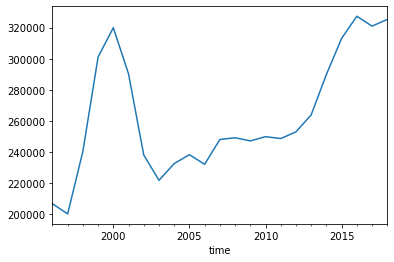

In [88]:
harris_dict[77494]['value'].plot()

In [57]:
harris_dict_annual[77547]['test'] = harris_dict_annual[77547]['value'].pct_change(periods=1)

In [58]:
harris_dict_annual[77547]

,RegionName,value,test
time,,,
1996-12-31,77547,44522.222222,NaN
1997-12-31,77547,44608.333333,0.001934
1998-12-31,77547,45933.333333,0.029703
1999-12-31,77547,49816.666667,0.084543
2000-12-31,77547,53258.333333,0.069087
2001-12-31,77547,54691.666667,0.026913
2002-12-31,77547,57558.333333,0.052415
2003-12-31,77547,62250.000000,0.081512
2004-12-31,77547,68650.000000,0.102811


In [24]:
(393616.666667-268775.000000)/(268775.000000)

0.46448392397730437

In [25]:
df_78722['time'] = pd.to_datetime(df_78722['time'])

NameError: name 'df_78722' is not defined

In [ ]:
df_78722.set_index('time', inplace=True)

In [ ]:
df_78722.columns

In [ ]:
df_78722.drop(columns=['RegionName', 'City', 'State', 'Metro', 'CountyName'], axis=1, inplace=True)

In [ ]:
df_78722['2012-01-01':].plot()

In [ ]:
df_78722['pct_change']=df_78722.pct_change(periods=1)

In [ ]:
df_78722

In [ ]:
df_yearly = df_78722.resample(rule='A').mean()

In [ ]:
df_yearly.drop('pct_change', axis=1, inplace=True)

In [ ]:
df_yearly.head(5)

In [ ]:
df_yearly.freq = 'Y'

In [ ]:
df_yearly['test'] = df_yearly.pct_change(periods=1)

In [ ]:
df_yearly.head(5)

In [ ]:
df_yearly['test']=df_yearly['test'].map(lambda x: x*100)

In [ ]:
df_yearly

In [ ]:
ax =df_yearly['test']['2010-01-01':].plot(figsize=(12,5))
from matplotlib import dates

# ax.xaxis.set_minor_locator(dates.MonthLocator())
# ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
ax.xaxis.set_minor_locator(dates.MonthLocator())
# ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))
ax.xaxis.set_minor_formatter(dates.DateFormatter(fmt="%Q"))

In [ ]:
df_austinlong.columns

In [ ]:
df_austinlong['RegionName'].value_counts(1)

In [ ]:
regions = list(df_austinlong['RegionName'].values)

In [ ]:
df_austinlong.columns

In [ ]:
df_austinlong

In [ ]:
df_austinlong.index = pd.to_datetime(df_austinlong.index)

In [ ]:
df_austinlong.sort_index()

In [ ]:
some_dict = {}
for i in regions:
    some_dict[i] = df_austinlong[df_austinlong['RegionName']==i]

In [ ]:
some_dict.keys()

In [ ]:
for k, v in some_dict.items():
    some_dict[k].drop(columns=['RegionName', 'City', 'State', 'Metro', 'CountyName'], axis=1,inplace=True)
    some_dict[k].sort_index(inplace=True)

In [ ]:

plt.plot(some_dict[78746])
plt.plot(some_dict[78747])

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(some_dict[78746], label='78747')
ax.plot(some_dict[78747])
ax.legend()

In [ ]:
df_78722=df_austinlong.loc[df_austinlong['RegionName']==78722]

In [ ]:
df_78722 = df_78722.sort_index()

In [ ]:
df_78722.drop(columns='pct_change', axis=1, inplace=True)

In [ ]:
df_78722_annual =df_78722.resample('Y').mean()

In [ ]:
df_78722_annual['year_5'] = df_78722_annual.pct_change(periods=5)

In [ ]:
df_78722_annual['year_2'] = df_78722_annual['value'].pct_change(periods=2)

In [ ]:
df_78722_annual['year_10'] = df_78722_annual['value'].pct_change(periods=10)

In [ ]:
df_78722_annual.drop(columns='test', axis=1, inplace=True)

In [ ]:
df_78722_annual.iloc[-1:,:]

In [ ]:
some_dict[78702].drop('RegionName', axis=1, inplace=True)

In [ ]:
some_dict[78703].columns

# Step 3: EDA and Visualization

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

# Step 4: Reshape from Wide to Long Format

In [ ]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Step 5: ARIMA Modeling

# Step 6: Interpreting Results